In [3]:
import matplotlib.pyplot as plt # https://matplotlib.org/stable/users/
%config InlineBackend.figure_format='retina'

import numpy as np

import pandas as pd
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/
# https://pandas.pydata.org/docs/user_guide/

import seaborn as sns
# https://seaborn.pydata.org/tutorial.html

In [4]:
np.__version__, pd.__version__, sns.__version__

('1.26.4', '2.2.2', '0.13.2')

In [7]:
%time df = pd.read_csv('C:/Users/97610/Downloads/chicago_divvy_trip_raw.csv') # 3.24 GB

CPU times: total: 1min 48s
Wall time: 2min 10s


In [ ]:
# df_original = df.copy()  # Creates a backup of the original DataFrame
# df = df_original.copy()  # If needed, restores the original DataFrame

In [ ]:
type(df)

In [ ]:
# Q: How many rows and columns are in the data?
df.shape

In [ ]:
len(df) # Number of rows

In [ ]:
df.size # (number of rows) x (number of columns)

In [ ]:
# Q: What do the raw data look like?
df

In [ ]:
df.head()

In [ ]:
df.tail(2)

In [ ]:
# Q: What are the row indices?
df.index

In [ ]:
# Q: What are the column names?
df.columns

In [ ]:
# Q: What does a row of raw data look like?
df.iloc[2] # See .loc[] .at[] .iat[]

In [ ]:
# Q: What column data types did Pandas infer?
df.dtypes

In [ ]:
# Q: How much memory is used?
df.info()

In [ ]:
df.describe().transpose() # Only numerical columns

In [ ]:
df.describe(include=object).T # Only non-numerical columns

In [ ]:
# Q: Number of missing data per column?
len(df) - df.count()

In [ ]:
type(df['trip_id'])

In [ ]:
df['trip_id']

In [ ]:
# Q: Any missing trip ID?
df['trip_id'].isna().any() # See .isnull() .notna() .notnull()

In [ ]:
# Q: Number of unique Trip IDs?
df['trip_id'].nunique()

In [ ]:
# Q: Any duplicated Trip ID? # A: 61 duplicated rows, NEED CODE TO CLEAN UP LATER: df = df.drop_duplicates(subset='trip_id', keep='first')
df['trip_id'].duplicated().any()

In [ ]:
type(df['usertype'])

In [ ]:
df['usertype']

In [ ]:
# Q: Any missing user type?
df['usertype'].isna().any() # See .isnull() .notna() .notnull()

In [ ]:
# Q: What is the distribution of user type?
df['usertype'].value_counts()

In [ ]:
ax = df['usertype'].value_counts().plot.bar(figsize=(5, 4), ylabel='Number of Trips')
ax.grid(linestyle=':')

In [ ]:
df['gender']

In [ ]:
# Q: Any missing gender?
df['gender'].isna().any()

In [ ]:
# Q: What is the distribution of gender?
df['gender'].value_counts()

In [ ]:
df['starttime']

In [ ]:
type(df['starttime'].iat[0])

In [11]:
df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d %H:%M:%S')
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

df['starttime']

0          2013-06-27 12:11:00
1          2013-06-27 12:06:00
2          2013-06-27 12:15:00
3          2013-06-27 14:44:00
4          2013-06-27 14:58:00
                   ...        
13774710   2017-10-01 00:01:00
13774711   2017-10-01 00:00:00
13774712   2017-10-01 00:00:00
13774713   2017-10-01 00:00:00
13774714   2017-10-01 00:00:00
Name: starttime, Length: 13774715, dtype: datetime64[ns]

In [ ]:
type(df['starttime'].iat[0])

In [ ]:
# Q: Any missing trip start time?
df['starttime'].isna().sum()

In [ ]:
# Q: Any calendar date not present?
df['starttime'].dt.date.unique().size

In [ ]:
# Q: How many trips per year?
df['starttime'].dt.year.value_counts().sort_index()

In [ ]:
# Q: How many trips per month?
df['starttime'].dt.month.value_counts().sort_index()

In [ ]:
# Q: How many trips per day?
df['starttime'].dt.day.value_counts().sort_index()

In [ ]:
import calendar # https://docs.python.org/3/library/calendar.html
import matplotlib.dates

fig = plt.figure(figsize=(10, 7))

ax1 = plt.subplot(2, 1, 1)
v1 = df['starttime'].dt.month.value_counts().sort_index()
ax1.plot(list(calendar.month_abbr)[1:], v1, 'o-', )
ax1.axhline(v1.mean(), linestyle='--', color='darkgray', zorder=1.5, # https://matplotlib.org/stable/gallery/misc/zorder_demo.html
            label=f'Mean = {round(v1.mean())}')
ax1.set_ylim(bottom=0, top=v1.max() * 1.2)
ax1.grid(linestyle=':')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Number of Divvy Trips')
ax1.legend(loc='upper left')
ax1.set_title('Number of Chicago Divvy Trips per Month From Year 2013 to 2017')

plt.subplots_adjust(hspace=0.4)  # Adjusts vertical space between plots

ax2 = plt.subplot(2, 1, 2)
v2 = df['starttime'].dt.date.value_counts().sort_index()
ax2.plot(v2)
ax2.axhline(v2.mean(), linestyle='--', color='darkgray', zorder=1.5, label=f'Mean = {v2.mean():.0f}')
ax2.xaxis.set(major_formatter=matplotlib.dates.ConciseDateFormatter(matplotlib.dates.AutoDateLocator()))
ax2.set_ylim(bottom=0, top=v2.max() * 1.2)
ax2.grid(linestyle=':')
ax2.set_xlabel('Day of Year')
ax2.set_ylabel('Number of Divvy Trips')
ax2.legend(loc='upper left', framealpha=1)
ax2.set_title('Number of Chicago Divvy Trips per Date From Year 2013 to 2017')

plt.show()

In [ ]:
# Q: Which dates had most trips?
df['starttime'].dt.date.value_counts().nlargest(10)

In [ ]:
# Q: Which dates had fewest trips?
df['starttime'].dt.date.value_counts().nsmallest(10)

In [ ]:
# Q: How many trips per day of week?
df['starttime'].dt.dayofweek.value_counts().sort_index() # 0 is Monday

In [ ]:
# Q: How many trips per hour?
df['starttime'].dt.hour.value_counts().sort_index()

In [ ]:
import matplotlib.gridspec
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html
from matplotlib.ticker import ScalarFormatter

fig = plt.figure(figsize=(10, 4))
gs = matplotlib.gridspec.GridSpec(1, 5, figure=fig, wspace=10)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:])

v1 = df['starttime'].dt.dayofweek.value_counts().sort_index()
ax1.plot(calendar.day_abbr, v1, 'o-')
ax1.axhline(v1.mean(), linestyle='--', color='darkgray', zorder=1.5, label=f'Mean = {v1.mean():.0f}')
ax1.set_ylim(bottom=0, top=v1.max() * 1.2)
ax1.grid(linestyle=':')
ax1.set_ylabel('Number of Divvy Trips')
ax1.legend(loc='lower left', framealpha=1)
ax1.set_title('Number of Chicago Divvy Trips per Day')

v2 = df['starttime'].dt.hour.value_counts().sort_index()
ax2.plot(v2, 'o-')
ax2.axhline(v2.mean(), linestyle='--', color='darkgray', zorder=1.5, label=f'Mean = {v2.mean():.0f}')
ax2.set_ylim(bottom=0, top=v2.max() * 1.2)
ax2.grid(linestyle=':')
ax2.set_xticks(np.arange(24))
ax2.tick_params(axis='x', rotation=90)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Number of Divvy Trips')
ax2.legend(loc='upper left', framealpha=1)
ax2.set_title('Number of Chicago Divvy Trips per Hour')

ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(style='plain', axis='y') 

plt.show()

In [ ]:
df['stoptime']

In [ ]:
df['stoptime'].isna().sum()

In [ ]:
type(df['stoptime'].iat[0])

In [13]:
df['stoptime'] = pd.to_datetime(df['stoptime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Q: How many missing trip end time?
df['stoptime'].isna().sum()

In [ ]:
type(df['stoptime'].iat[0])

In [ ]:
df[df['stoptime'].isna()].count() # All do not have trip seconds and dropoff location

In [ ]:
# Q: How many trips have end time before start time?
df[df['starttime'] > df['stoptime']]

In [ ]:
# Q: Is trip seconds always missing when trip end time before start time?
df['tripduration'][df['starttime'] > df['stoptime']].isna().all()

In [ ]:
is_dirty = (df['gender'].isna() |
            (df['starttime'] > df['stoptime']))
is_dirty.sum()

In [ ]:
# df = df[~is_dirty]  # This will directly delete the dirty rows above (missing gender and starttime > stoptime)

# Do this first:
# df_original = df.copy()  # Creates a backup of the original DataFrame

# Then delete:
# is_dirty = (df['gender'].isna() | (df['starttime'] > df['stoptime']))
# df = df[~is_dirty]  # Filtered DataFrame

# If want to restore original copy:
# df = df_original.copy()  # Restores the original DataFrame

In [ ]:
df['tripduration']

In [ ]:
# Q: How many missing trip seconds?
df['tripduration'].isna().sum()

In [ ]:
# Q: What is the distribution of trip seconds?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['tripduration'] / 3600).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Trip Hours')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['tripduration'] / 3600).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Trip Hours')
ax2.set_ylabel('Number of Trips')

plt.show()

In [ ]:
# Q: What is the range of trip seconds?
df['tripduration'].min(), df['tripduration'].max(), df['tripduration'].max() / 3600

In [ ]:
# Q: Is trip seconds an integer?
idx = df['tripduration'].notna()
(df['tripduration'][idx].round() == df['tripduration'][idx]).all()

In [ ]:
# Q: What is the distribution of trip seconds < 10 mins?
ax = (df['tripduration'][df['tripduration'] < 10 * 60]).hist(figsize=(10, 4), bins=600, grid=False)
ax.set_xticks(np.arange(0, 600 + 0.1, 60))
ax.grid(linestyle=':')
ax.set_xlabel('Trip Duration (Seconds)')
ax.set_ylabel('Number of Trips')

In [ ]:
# Q: What trip seconds represent the spikes above?
df['tripduration'][df['tripduration'] < 600].value_counts().head(10).sort_index()

In [ ]:
# Q: Anything special about rows with 60 trip seconds?
df[df['tripduration'] == 60].sample(10)

In [ ]:
# Q: What are most common temperatures when people have 60 trip seconds?
df['temperature'][df['tripduration'] == 60].value_counts().head(20)

In [ ]:
# Q: What does weather look like when people have 60 trip seconds?
df['events'][df['tripduration'] == 60].value_counts().head(20)

In [ ]:
df['conditions'][df['tripduration'] == 60].value_counts().head(20)

In [ ]:
# Q: What is the distribution of trip seconds > 20 hours?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
idx = df['tripduration'] > 20 * 3600
(df['tripduration'][idx] / 3600).hist(ax=ax1, bins=10, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Trip Hours')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['tripduration'][idx] / 3600).hist(ax=ax2, bins=500, grid=False)
ax2.grid(linestyle=':')
ax2.set_xlabel('Trip Hours')
ax2.set_ylabel('Number of Trips')

plt.show()

In [7]:
# Q: Anything special about rows with largest trip seconds?
df.nlargest(10, 'tripduration') # df.sort_values('Trip Seconds', ascending=False).head(10)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_id,from_station_name,latitude_start,longitude_start,...,windchill,dewpoint,humidity,pressure,visibility,wind_speed,precipitation,events,rain,conditions
93183,155734,Customer,NaN,2013-08-04 12:55:00,2013-08-05 12:55:00,86399,72,State St & 16th St,41.860121,-87.627729,...,-999.0,55.9,57.0,30.17,10.0,11.5,-9999.00,mostlycloudy,0,Mostly Cloudy
2899539,4194035,Customer,NaN,2014-11-09 10:14:00,2014-11-10 10:14:00,86392,168,Michigan Ave & 14th St,41.864059,-87.623727,...,36.2,27.0,51.0,29.84,10.0,18.4,-9999.00,cloudy,0,Overcast
570708,818483,Customer,NaN,2013-10-19 10:33:00,2013-10-20 10:32:00,86389,335,Calumet Ave & 35th St,41.831379,-87.618034,...,-999.0,36.0,61.0,29.83,10.0,9.2,-9999.00,partlycloudy,0,Partly Cloudy
3083372,3935464,Customer,NaN,2014-10-12 11:21:00,2014-10-13 11:20:00,86367,193,State St & 29th St,41.841707,-87.626938,...,-999.0,39.9,51.0,30.04,10.0,13.8,-9999.00,partlycloudy,0,Partly Cloudy
8162755,11747944,Customer,NaN,2016-09-06 21:00:55,2016-09-07 21:00:19,86365,252,Greenwood Ave & 47th St,41.809835,-87.599383,...,-999.0,72.0,69.0,30.01,10.0,6.9,-9999.00,partlycloudy,0,Scattered Clouds
5245479,6674431,Customer,NaN,2015-08-03 21:58:00,2015-08-04 21:57:00,86362,391,Halsted St & 69th St,41.769062,-87.644614,...,-999.0,54.0,57.0,29.89,10.0,5.8,-9999.00,partlycloudy,0,Partly Cloudy
9977948,13481458,Customer,NaN,2017-03-26 08:07:43,2017-03-27 08:06:41,86338,176,Clark St & Elm St,41.902973,-87.631280,...,-999.0,48.9,89.0,29.85,1.5,10.4,0.04,cloudy,0,Overcast
2188521,3635335,Customer,NaN,2014-09-18 13:47:00,2014-09-19 13:46:00,86336,110,State St & Erie St,41.893975,-87.628623,...,-999.0,53.6,60.0,30.13,10.0,9.2,-9999.00,partlycloudy,0,Scattered Clouds
7542157,10187991,Customer,NaN,2016-06-18 22:33:00,2016-06-19 22:31:00,86322,56,Desplaines St & Kinzie St,41.888716,-87.644448,...,-999.0,51.1,43.0,30.22,10.0,3.5,-9999.00,mostlycloudy,0,Mostly Cloudy
5208629,6720808,Customer,NaN,2015-08-06 00:39:00,2015-08-07 00:37:00,86314,22,May St & Taylor St,41.869482,-87.655486,...,-999.0,64.0,87.0,29.97,10.0,5.8,-9999.00,cloudy,0,Overcast


In [9]:
is_dirty = (df['tripduration'] > 3600)
is_dirty.sum()

302597

In [309]:
# When you finish all location data analysis, back to here to do x = temperature, y = tripduration:
ax = df.plot.scatter(x='temperature', y='tripduration', alpha=0.05, figsize=(6, 5))
ax.grid(linestyle=':')

MemoryError: Unable to allocate 1.44 GiB for an array with shape (14, 13774715) and data type float64

In [13]:
df['from_station_id']

0            85
1            85
2            28
3            32
4            32
           ... 
13774710    289
13774711     45
13774712    520
13774713    288
13774714    135
Name: from_station_id, Length: 13774715, dtype: int64

In [15]:
df['from_station_name']

0                  Michigan Ave & Oak St
1                  Michigan Ave & Oak St
2             Larrabee St & Menomonee St
3             Racine Ave & Congress Pkwy
4             Racine Ave & Congress Pkwy
                        ...             
13774710           Wells St & Concord Ln
13774711    Michigan Ave & Congress Pkwy
13774712      Greenview Ave & Jarvis Ave
13774713      Larrabee St & Armitage Ave
13774714            Halsted St & 21st St
Name: from_station_name, Length: 13774715, dtype: object

In [41]:
# Q: What is the range of starting station ID?
df['from_station_id'].min(), df['from_station_id'].max()

(2, 626)

In [43]:
# Q: Number of unique starting station IDs?
df['from_station_id'].nunique()

586

In [63]:
# Q: Number of unique starting station names?
df['from_station_name'].nunique()

663

In [19]:
# Q: Any typo in starting station names?
import pandas as pd

# Set display options to show all rows
pd.set_option('display.max_rows', 663)

# Display all rows of from_station_name value counts, sorted by index
df['from_station_name'].value_counts().sort_index()

from_station_name
2112 W Peterson Ave                       1387
63rd St Beach                             3270
900 W Harrison                            5000
900 W Harrison St                        14279
Aberdeen St & Jackson Blvd               37841
Aberdeen St & Madison St                 16591
Aberdeen St & Monroe St                  21098
Aberdeen St & Monroe St (Madison St)      6227
Ada St & Washington Blvd                 30688
Adler Planetarium                        79881
Albany (Kedzie) Ave & Montrose Ave        1018
Albany Ave & 26th St                       488
Albany Ave & Bloomingdale Ave            13376
Albany Ave & Montrose Ave                  627
Artesian Ave & Hubbard St                14937
Ashland Ave & 13th St                     6025
Ashland Ave & 21st St                     4118
Ashland Ave & 50th St                       88
Ashland Ave & 63rd St                       92
Ashland Ave & 66th St                       20
Ashland Ave & 69th St                     

In [91]:
# Q: Any typo in starting station names?
station_counts = df.groupby(['from_station_name', 'from_station_id']).size()
station_counts.sort_index().reset_index(name='count')

,from_station_name,from_station_id,count
0,2112 W Peterson Ave,456,1387
1,63rd St Beach,101,3270
2,900 W Harrison,109,5000
3,900 W Harrison St,109,14279
4,Aberdeen St & Jackson Blvd,21,37841
...,...,...,...
658,Wood St & Taylor St,317,20866
659,Woodlawn Ave & 55th St,248,12391
660,Woodlawn Ave & 75th St,569,30
661,Woodlawn Ave & Lake Park Ave,413,2578


In [123]:
# Q: What are the starting station names that have duplicated station ID?
duplicate_station_ids = df.groupby('from_station_id').filter(lambda x: x['from_station_name'].nunique() > 1)
result = duplicate_station_ids[['from_station_id', 'from_station_name']].drop_duplicates().sort_values('from_station_id')
result

MemoryError: Unable to allocate 1.44 GiB for an array with shape (14, 13774715) and data type float64

In [109]:
df['to_station_id']

0            28
1            85
2            28
3            32
4            19
           ... 
13774710    226
13774711     52
13774712    447
13774713    289
13774714    129
Name: to_station_id, Length: 13774715, dtype: int64

In [111]:
df['to_station_name']

0           Larrabee St & Menomonee St
1                Michigan Ave & Oak St
2           Larrabee St & Menomonee St
3           Racine Ave & Congress Pkwy
4                Loomis St & Taylor St
                       ...            
13774710      Racine Ave & Belmont Ave
13774711        Michigan Ave & Lake St
13774712      Glenwood Ave & Morse Ave
13774713         Wells St & Concord Ln
13774714     Blue Island Ave & 18th St
Name: to_station_name, Length: 13774715, dtype: object

In [113]:
# Q: What is the range of ending station ID?
df['to_station_id'].min(), df['to_station_id'].max()

(2, 626)

In [115]:
# Q: Number of unique ending station IDs?
df['to_station_id'].nunique()

586

In [117]:
# Q: Number of unique ending station names?
df['to_station_name'].nunique()

663

In [119]:
# Q: Any typo in ending station names?
df['to_station_name'].value_counts().sort_index()

to_station_name
2112 W Peterson Ave              1392
63rd St Beach                    3267
900 W Harrison                   4551
900 W Harrison St               13388
Aberdeen St & Jackson Blvd      37152
                                ...  
Wood St & Taylor St             21676
Woodlawn Ave & 55th St          11592
Woodlawn Ave & 75th St             27
Woodlawn Ave & Lake Park Ave     2689
Yates Blvd & 75th St              341
Name: count, Length: 663, dtype: int64

In [121]:
# Q: Any typo in ending station names?
station_counts = df.groupby(['to_station_name', 'to_station_id']).size()
station_counts.sort_index().reset_index(name='count')

,to_station_name,to_station_id,count
0,2112 W Peterson Ave,456,1392
1,63rd St Beach,101,3267
2,900 W Harrison,109,4551
3,900 W Harrison St,109,13388
4,Aberdeen St & Jackson Blvd,21,37152
...,...,...,...
658,Wood St & Taylor St,317,21676
659,Woodlawn Ave & 55th St,248,11592
660,Woodlawn Ave & 75th St,569,27
661,Woodlawn Ave & Lake Park Ave,413,2689


In [125]:
# Q: What are the ending station names that have duplicated station ID?
duplicate_station_ids = df.groupby('to_station_id').filter(lambda x: x['to_station_name'].nunique() > 1)
result = duplicate_station_ids[['to_station_id', 'to_station_name']].drop_duplicates().sort_values('to_station_id')
result

,to_station_id,to_station_name
3377380,2,Michigan Ave & Balbo Ave
4270973,2,Buckingham Fountain
1654257,15,Racine Ave & 19th St
82,15,Racine Ave & 18th St
67,16,Wood St & North Ave
...,...,...
9966031,561,Damen Ave & 59th St
7959597,574,Vernon Ave & 79th St
11501315,574,Eberhart (Vernon) Ave & 79th St
10241174,578,Bennett Ave & 79th St


In [27]:
# Q: Does at least one of starting latitude or longitude exist when starting docking station exists?
(df
 [['latitude_start', 'longitude_start']]
 [df['dpcapacity_start'].notna()]
 .notna()
 .any(axis=1)
 .all())

True

In [25]:
# Q: Does at least one of ending latitude or longitude exist when ending docking station exists?
(df
 [['latitude_end', 'longitude_end']]
 [df['dpcapacity_end'].notna()]
 .notna()
 .any(axis=1)
 .all())

True

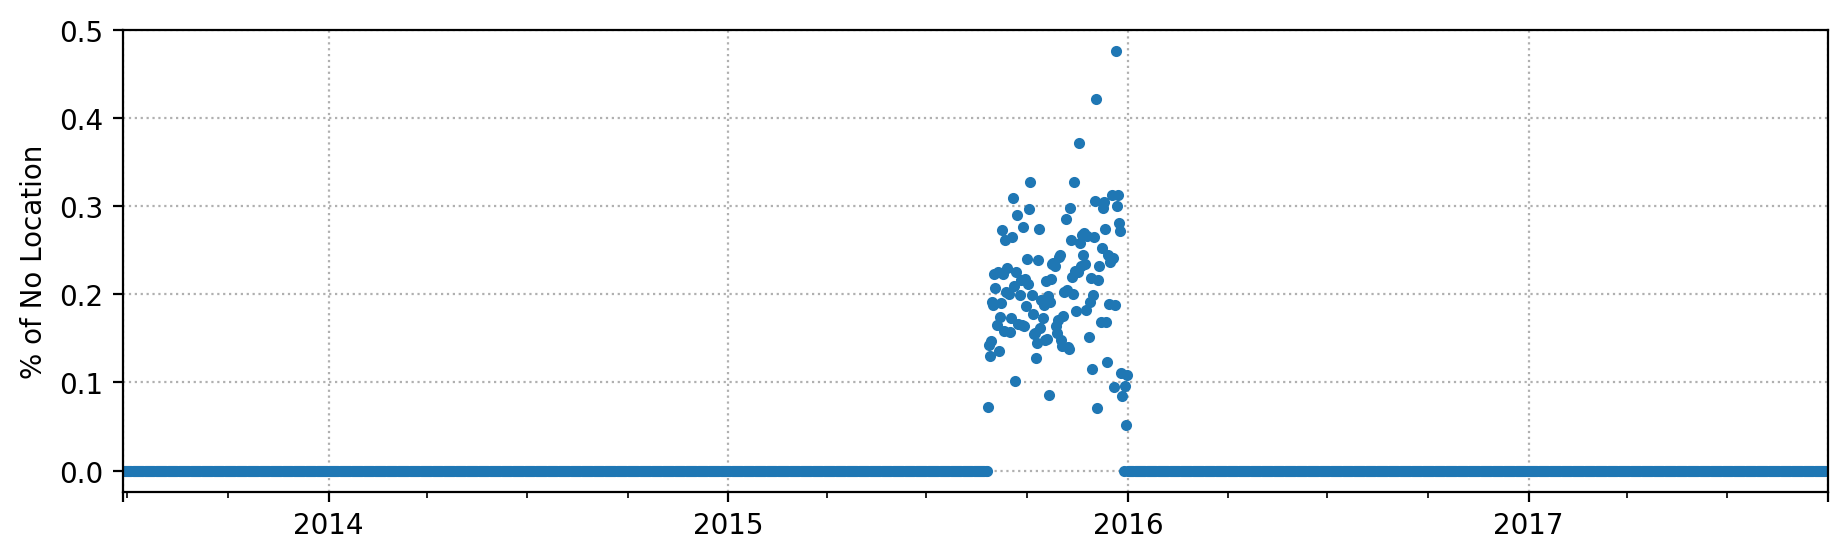

In [55]:
# Q: Is starting and ending latitude missing randomly over date?
ax = (df
      .assign(no_location=df['latitude_start'].isna() | df['latitude_end'].isna())
      .groupby(df['starttime'].dt.date) # https://pandas.pydata.org/docs/user_guide/groupby.html
      ['no_location']
      .mean()
      .mul(100)
      .reindex(index=pd.date_range('2013-06-27', '2017-10-01'), fill_value=0)
      .plot(figsize=(11, 3), marker='.', linestyle='', ylabel='% of No Location'))
ax.grid(linestyle=':')

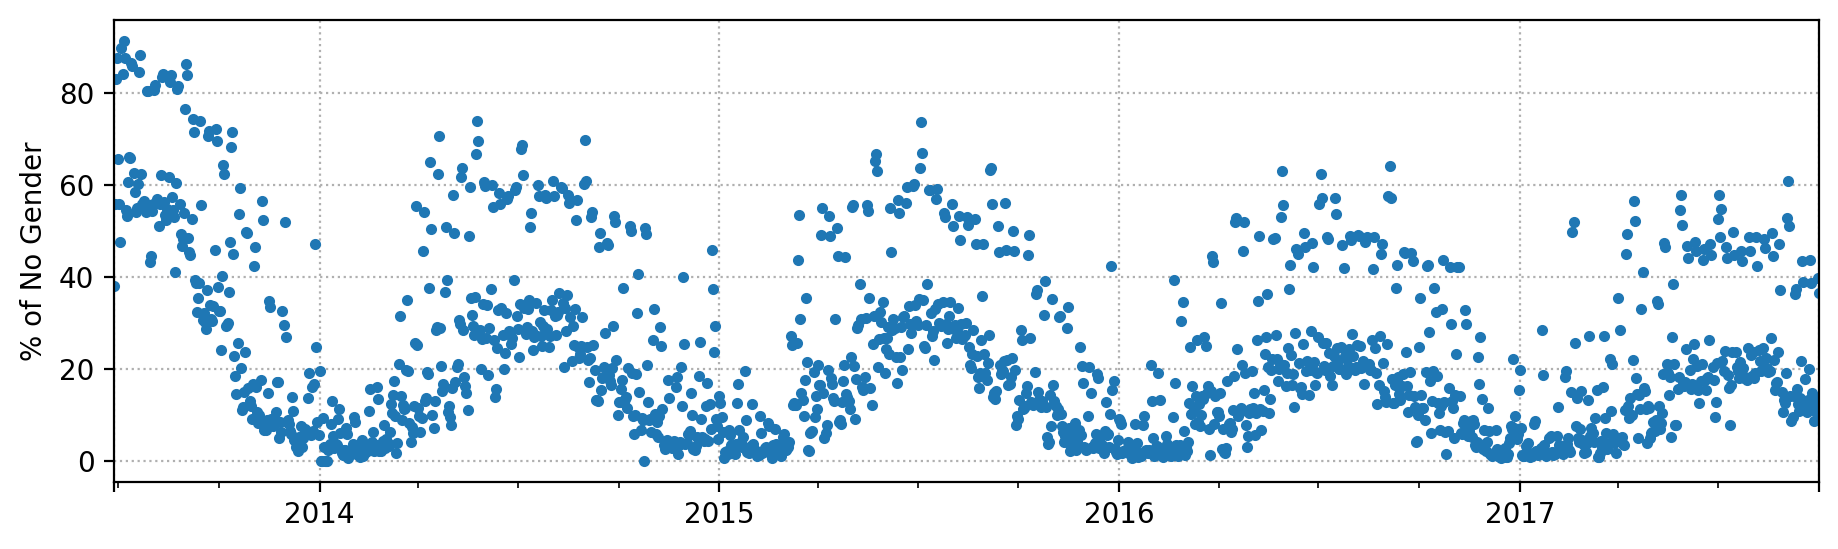

In [17]:
# Q: Is gender missing randomly over date?
ax = (df
      .assign(no_gender=df['gender'].isna())
      .groupby(df['starttime'].dt.date) # https://pandas.pydata.org/docs/user_guide/groupby.html
      ['no_gender']
      .mean()
      .mul(100)
      .reindex(index=pd.date_range('2013-06-27', '2017-10-01'), fill_value=0)
      .plot(figsize=(11, 3), marker='.', linestyle='', ylabel='% of No Gender'))
ax.grid(linestyle=':')

In [57]:
is_dirty = (df['latitude_start'].isna()|
            (df['latitude_end'].isna()))
is_dirty.sum()

2321

In [59]:
df.count()

trip_id              13774715
usertype             13774715
gender               10017783
starttime            13774715
stoptime             13774715
tripduration         13774715
from_station_id      13774715
from_station_name    13774715
latitude_start       13773562
longitude_start      13773562
dpcapacity_start     13773562
to_station_id        13774715
to_station_name      13774715
latitude_end         13773535
longitude_end        13773535
dpcapacity_end       13773535
temperature          13774715
windchill            13774715
dewpoint             13774715
humidity             13773795
pressure             13774715
visibility           13774715
wind_speed           13774715
precipitation        13774715
events               13774715
rain                 13774715
conditions           13774715
dtype: int64

In [167]:
# Q: What's the percentage of trips in each event?
pd.concat([(df['events'].value_counts() / df['events'].count()).rename('Trip % in Weather Events')],
          join='inner', axis=1).round(4) * 100

,Trip % in Weather Events
events,
partlycloudy,35.31
mostlycloudy,32.04
cloudy,21.67
clear,5.55
rain,3.21
tstorms,0.71
snow,0.70
hazy,0.62
fog,0.16


In [161]:
# Q: What's the percentage of trips in each weather condition?
pd.concat([(df['conditions'].value_counts() / df['conditions'].count()).rename('Trip % in Weather Conditions')],
          join='inner', axis=1).round(4) * 100

,Trip % in Weather Conditions
conditions,
Mostly Cloudy,32.04
Overcast,21.67
Partly Cloudy,18.13
Scattered Clouds,17.18
Clear,5.55
Light Rain,2.41
Light Snow,0.66
Haze,0.58
Light Drizzle,0.49


In [107]:
df['rain']

0           0
1           0
2           0
3           0
4           0
           ..
13774710    0
13774711    0
13774712    0
13774713    0
13774714    0
Name: rain, Length: 13774715, dtype: int64

In [129]:
# Q: How many trips are in rainy/non-rainy day?
df['rain'].value_counts().sort_index()

rain
0    13346094
1      428621
Name: count, dtype: int64

In [131]:
# Q: Are temperature, windchill, dewpoint, humidity, pressure, visibility, wind speed, and precipitation missing simultaneously?
temp_cols = ['temperature', 'windchill', 'dewpoint', 'humidity', 'pressure', 'visibility', 'wind_speed', 'precipitation']
df[temp_cols].apply(pd.isna).value_counts()

temperature  windchill  dewpoint  humidity  pressure  visibility  wind_speed  precipitation
False        False      False     False     False     False       False       False            13773795
                                  True      False     False       False       False                 920
Name: count, dtype: int64

In [133]:
# Q: What is the range of temperature, windchill, dewpoint, humidity, pressure, visibility, wind speed, and precipitation?
df[temp_cols].describe().round(2)

,temperature,windchill,dewpoint,humidity,pressure,visibility,wind_speed,precipitation
count,13774715.00,13774715.00,13774715.00,13773795.00,13774715.00,13774715.00,13774715.00,13774715.00
mean,64.69,-854.71,48.65,58.88,26.77,7.92,7.20,-9315.68
std,81.11,356.68,83.50,16.97,180.07,130.95,175.92,2523.01
min,-9999.00,-999.00,-9999.00,13.00,-9999.00,-9999.00,-9999.00,-9999.00
25%,55.90,-999.00,39.90,46.00,29.89,10.00,6.90,-9999.00
50%,69.80,-999.00,52.00,58.00,30.00,10.00,10.40,-9999.00
75%,78.10,-999.00,61.00,71.00,30.11,10.00,13.80,-9999.00
max,96.10,45.20,78.10,100.00,30.83,10.00,42.60,0.87


In [195]:
# Chicago Typical Range:
# Temperature  Windchill  Dewpoint  Humidity   Pressure    Visibility   Wind Speed   Precipitation
#   15-90F      -82-87F    0-75F     40-90%   29-30.5inHg    0-6miles    10-30mph      2-5inches

# This dataset range (According to below analysis):
# Temperature  Windchill  Dewpoint  Humidity   Pressure    Visibility   Wind Speed   Precipitation
#  -15-96F     -40-45F    -25-78F   13-100%   29-30.8inHg   0-10miles    0-42.6mph    0-0.87inches

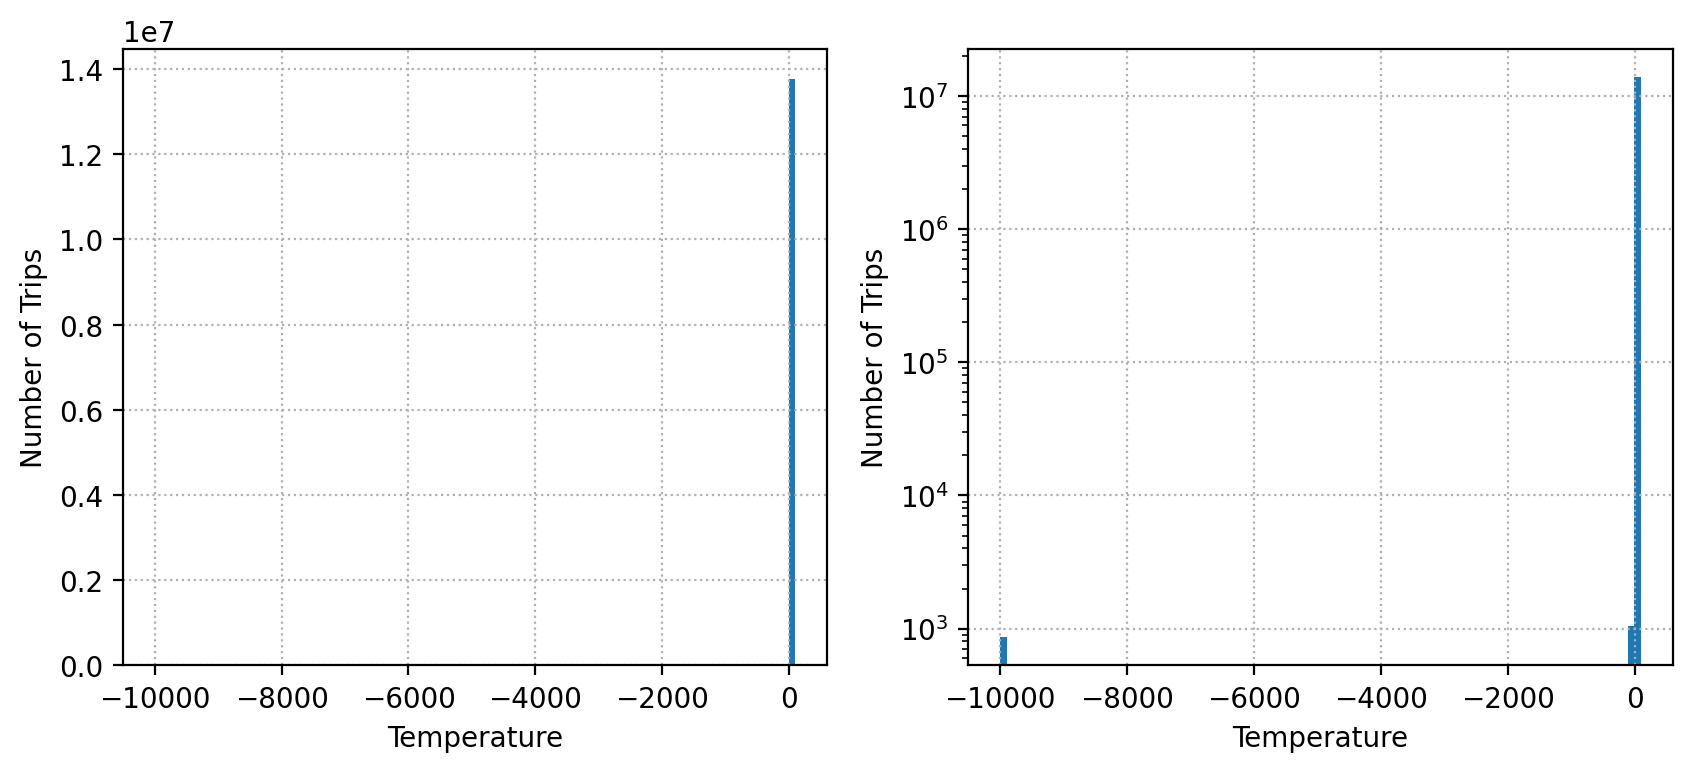

In [141]:
# Q: What is the distribution of temperature?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['temperature']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['temperature']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Number of Trips')

plt.show()

Text(0, 0.5, 'Number of Trips')

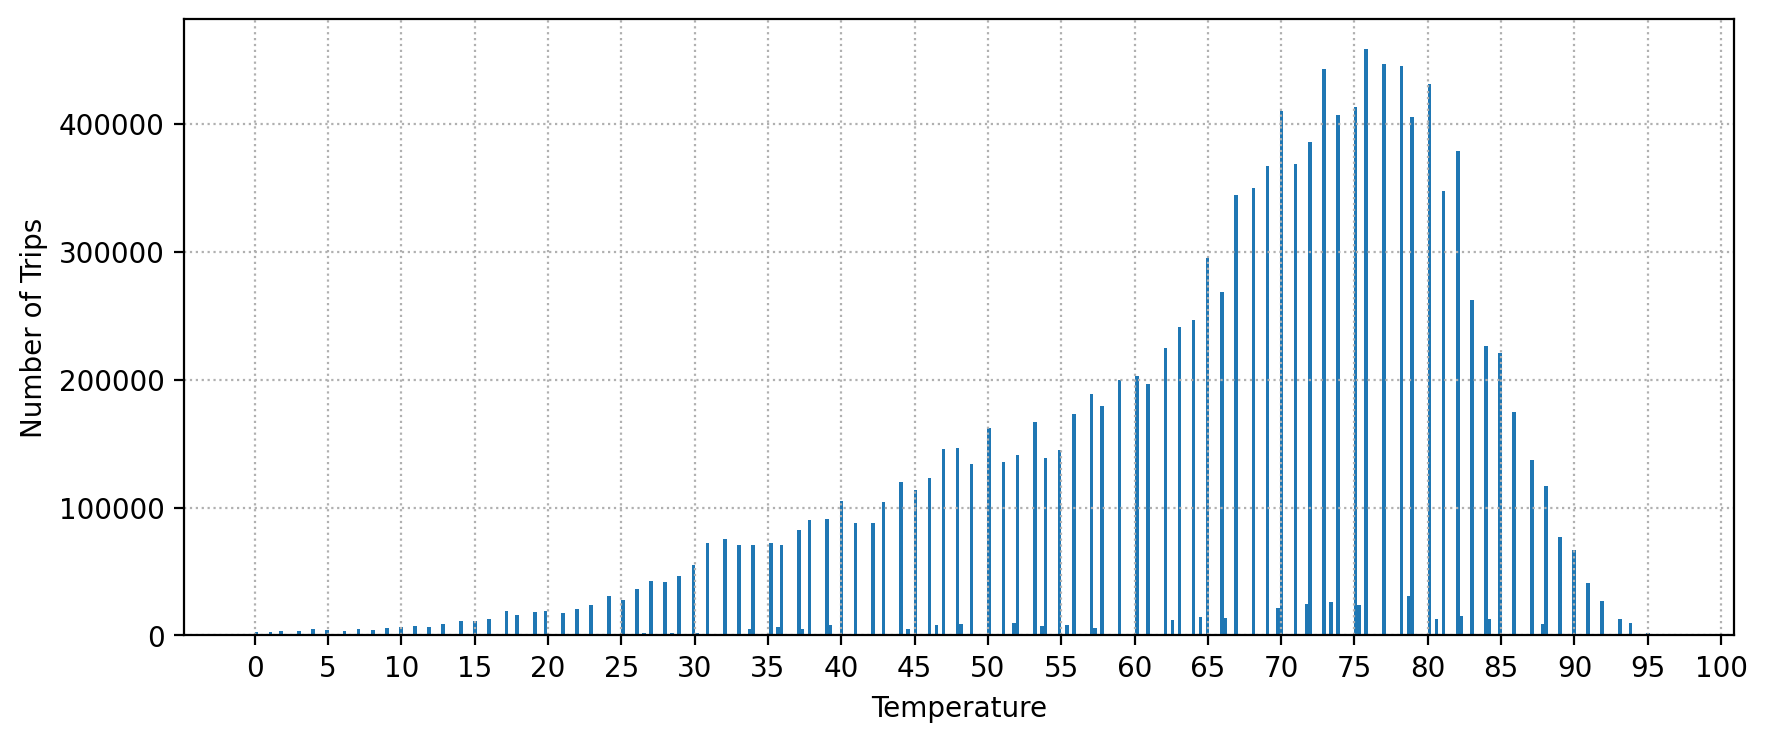

In [145]:
# Q: What is the distribution of temperature >= 0°F?
ax = (df['temperature'][df['temperature'] >= 0]).hist(figsize=(10, 4), bins=400, grid=False)
ax.set_xticks(np.arange(0, 100 + 0.1, 5))
ax.grid(linestyle=':')
ax.set_xlabel('Temperature')
ax.set_ylabel('Number of Trips')

In [147]:
# Q: What temperature represents the spikes above?
df['temperature'].value_counts().head(10)

temperature
75.9    458559
77.0    446375
78.1    445414
73.0    443016
80.1    431258
75.0    413000
70.0    410075
73.9    406521
79.0    405320
72.0    385597
Name: count, dtype: int64

In [151]:
# Q: How many -9999F temperature (anomaly)?
df['temperature'].value_counts().sort_index()

temperature
-9999.0      858
-15.0          1
-11.9          5
-11.0         28
-9.9          46
           ...  
 91.9      26807
 93.0      12471
 93.9       9926
 95.0       2144
 96.1        468
Name: count, Length: 153, dtype: int64

In [153]:
# Q: Anything special about rows with largest temperature?
df.nlargest(10, 'temperature')

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_id,from_station_name,latitude_start,longitude_start,...,windchill,dewpoint,humidity,pressure,visibility,wind_speed,precipitation,events,rain,conditions
241868,360887,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:32:00,1932,174,Canal St & Madison St,41.882091,-87.639833,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241869,360889,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:15:00,908,85,Michigan Ave & Oak St,41.900960,-87.623777,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241870,360890,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:12:00,734,35,Streeter Dr & Illinois St,41.891071,-87.612200,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241871,360891,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:20:00,1207,97,Museum Campus,41.865212,-87.617759,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241872,360892,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:19:00,1169,181,LaSalle St & Illinois St,41.890749,-87.632060,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241873,360893,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:19:00,1122,173,Mies van der Rohe Way & Chicago Ave,41.896910,-87.621743,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241874,360895,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:33:00,1970,198,Halsted St & Madison St,41.881750,-87.647800,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241875,360896,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:12:00,714,35,Streeter Dr & Illinois St,41.891071,-87.612200,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241876,360897,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:20:00,1209,97,Museum Campus,41.865212,-87.617759,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds
241877,360898,Customer,NaN,2013-08-30 15:00:00,2013-08-30 15:15:00,878,85,Michigan Ave & Oak St,41.900960,-87.623777,...,-999.0,70.0,43.0,29.78,10.0,13.8,-9999.0,partlycloudy,0,Scattered Clouds


In [165]:
# Q: Which weather conditions have temperature > 90F?
idx = df['temperature'] > 90
pd.concat([(df['conditions'][idx].value_counts() / idx.sum()).rename('> 90°F Temperature of Trip % in Weather Conditions'),
           (df['conditions'].value_counts() / df['conditions'].count()).rename('Total Trip % in Weather Conditions')],
          join='inner', axis=1).round(4) * 100

,> 90°F Temperature of Trip % in Weather Conditions,Total Trip % in Weather Conditions
conditions,,
Mostly Cloudy,33.20,32.04
Partly Cloudy,32.47,18.13
Scattered Clouds,31.47,17.18
Thunderstorm,1.77,0.33
Clear,1.10,5.55


In [169]:
# Q: How many -999F windchill (anomaly)?
df['windchill'].value_counts().sort_index()

windchill
-999.0    11837251
-40.0            1
-29.9           19
-28.8            3
-28.6           26
            ...   
 43.5         3985
 43.9         6366
 44.3          180
 44.8         5033
 45.2           45
Name: count, Length: 604, dtype: int64

In [173]:
# Q: How many -9999F dewpoint (anomaly)?
df['dewpoint'].value_counts().sort_index()

dewpoint
-9999.0      920
-25.1          1
-20.0        178
-18.9        133
-18.0        237
           ...  
 75.0      18407
 75.2       2168
 75.9       9484
 77.0       5708
 78.1       2912
Name: count, Length: 144, dtype: int64

In [185]:
# Q: How many XXX% humidity (anomaly)? We already know humidity have 920 missing values
df['humidity'].value_counts().sort_index()

humidity
13.0        440
15.0        681
16.0       1534
17.0       3004
18.0       9300
          ...  
93.0     168892
94.0      17767
96.0      51785
97.0      35634
100.0     42587
Name: count, Length: 84, dtype: int64

In [187]:
# Q: How many -9999inHg pressure (anomaly)?
df['pressure'].value_counts().sort_index()

pressure
-9999.00    4442
 29.06         9
 29.07        43
 29.08       147
 29.10       378
            ... 
 30.78       636
 30.79       460
 30.80       181
 30.81       296
 30.83        84
Name: count, Length: 174, dtype: int64

In [189]:
# Q: How many -9999miles visibility (anomaly)?
df['visibility'].value_counts().sort_index()

visibility
-9999.0        2358
 0.0           2476
 0.1           4079
 0.2          12494
 0.5          15801
 0.8          12467
 1.0          17898
 1.2          13839
 1.5          20709
 1.8          13702
 2.0          46429
 2.5          40786
 3.0          80348
 4.0         100832
 5.0         136536
 6.0         132477
 7.0         145419
 8.0         173148
 9.0         242200
 10.0      12560717
Name: count, dtype: int64

In [191]:
# Q: How many -9999mph wind speed (anomaly)?
df['wind_speed'].value_counts().sort_index()

wind_speed
-9999.0       4253
 0.0        541634
 3.5        527409
 4.6        831596
 5.8       1013709
 6.9       1172620
 8.1       1335498
 9.2       1394610
 10.4      1349666
 11.5      1194048
 12.7       965469
 13.8       820089
 15.0       653402
 16.1       537519
 17.3       386734
 18.4       308533
 19.6       216728
 20.7       171041
 21.9       112912
 23.0        79574
 24.2        56678
 25.3        39233
 26.5        19662
 27.6        12807
 28.8         6134
 29.9        10065
 31.1         6646
 32.2         3083
 33.4         1311
 34.5          685
 35.7          471
 36.8           62
 38.0          149
 40.3           25
 41.4          267
 42.6          393
Name: count, dtype: int64

In [193]:
# Q: How many -9999inches precipitation (anomaly)?
df['precipitation'].value_counts().sort_index()

precipitation
-9999.00    12833368
 0.00         640902
 0.01         124832
 0.02          52025
 0.03          23798
 0.04          23836
 0.05          16350
 0.06           9330
 0.07          10032
 0.08           7407
 0.09           5311
 0.10           3677
 0.11           3768
 0.12           2649
 0.13           2150
 0.14           3554
 0.15           1973
 0.16           1473
 0.17           1476
 0.18            237
 0.19            343
 0.20            114
 0.21            147
 0.22             98
 0.23            312
 0.25            109
 0.26            944
 0.27           1152
 0.28            198
 0.29              6
 0.30             81
 0.31            141
 0.32              8
 0.34            154
 0.35            925
 0.37            241
 0.38           1139
 0.39            142
 0.41              7
 0.43              4
 0.47            244
 0.58              3
 0.78             25
 0.83             19
 0.87             11
Name: count, dtype: int64

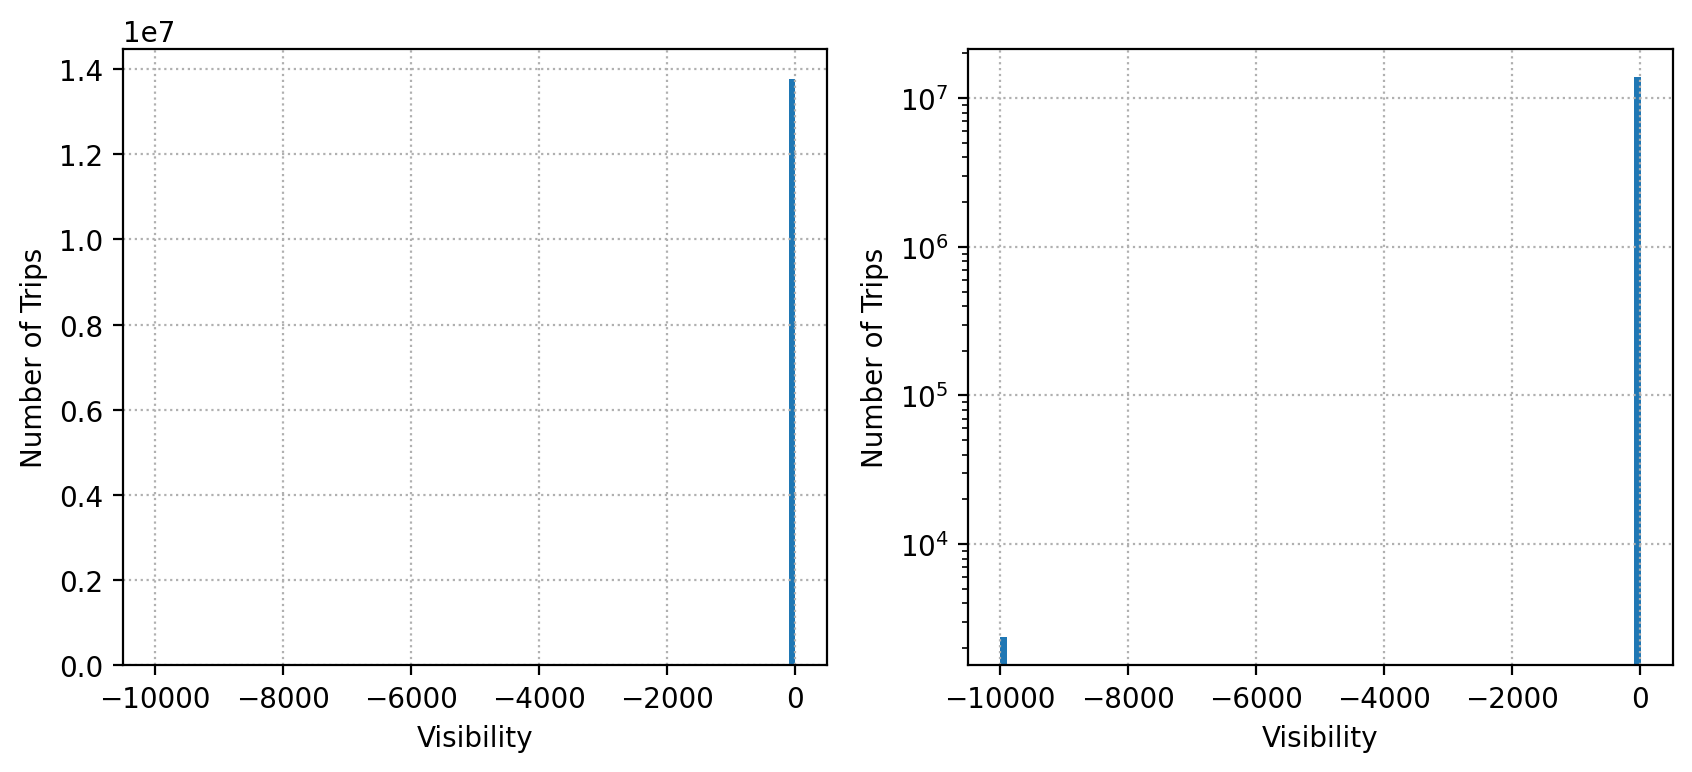

In [197]:
# Q: What is the distribution of visibility?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['visibility']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Visibility')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['visibility']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Visibility')
ax2.set_ylabel('Number of Trips')

plt.show()

Text(0, 0.5, 'Number of Trips')

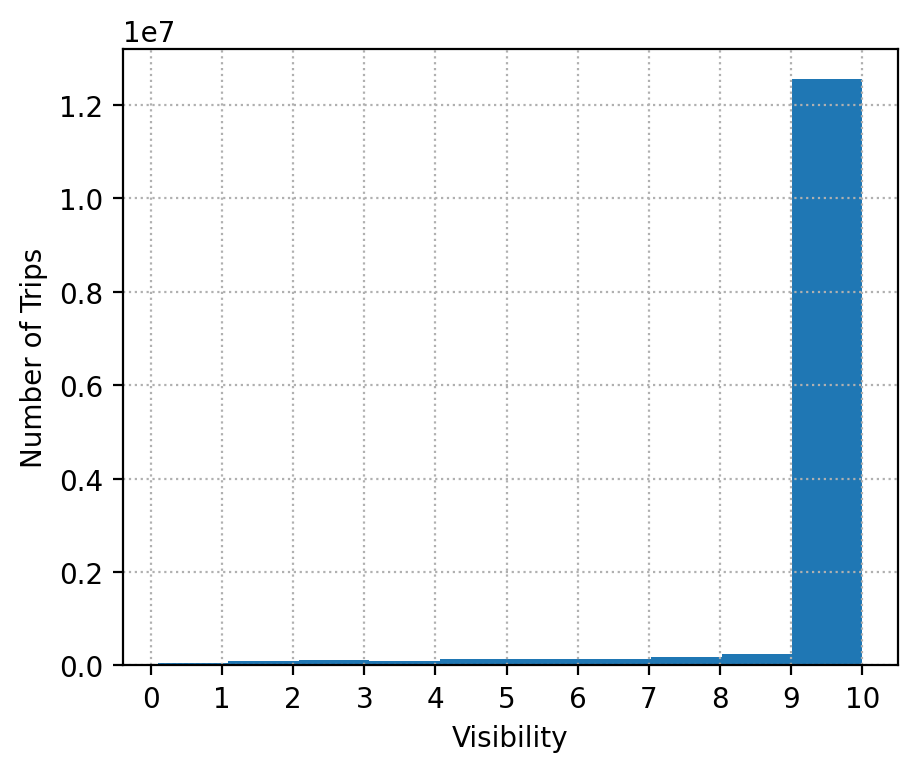

In [253]:
# Q: What is the distribution of visibility > 0 miles?
ax = (df['visibility'][df['visibility'] > 0]).hist(figsize=(5, 4), bins=10, grid=False)
ax.set_xticks(np.arange(0, 10 + 0.1, 1))
ax.grid(linestyle=':')
ax.set_xlabel('Visibility')
ax.set_ylabel('Number of Trips')

In [231]:
# Q: What visibility represents the spikes above?
df['visibility'].value_counts().head(10)

visibility
10.0    12560717
9.0       242200
8.0       173148
7.0       145419
5.0       136536
6.0       132477
4.0       100832
3.0        80348
2.0        46429
2.5        40786
Name: count, dtype: int64

In [233]:
# Q: Anything special about rows with largest visibility?
df.nlargest(10, 'visibility')

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_id,from_station_name,latitude_start,longitude_start,...,windchill,dewpoint,humidity,pressure,visibility,wind_speed,precipitation,events,rain,conditions
0,4118,Customer,NaN,2013-06-27 12:11:00,2013-06-27 12:16:00,316,85,Michigan Ave & Oak St,41.900960,-87.623777,...,-999.0,69.1,55.0,29.75,10.0,13.8,-9999.0,mostlycloudy,0,Mostly Cloudy
1,4095,Subscriber,Male,2013-06-27 12:06:00,2013-06-27 12:11:00,301,85,Michigan Ave & Oak St,41.900960,-87.623777,...,-999.0,69.1,55.0,29.75,10.0,13.8,-9999.0,mostlycloudy,0,Mostly Cloudy
2,4192,Subscriber,Male,2013-06-27 12:15:00,2013-06-27 12:16:00,60,28,Larrabee St & Menomonee St,41.914680,-87.643320,...,-999.0,69.1,55.0,29.75,10.0,13.8,-9999.0,mostlycloudy,0,Mostly Cloudy
3,4275,Customer,NaN,2013-06-27 14:44:00,2013-06-27 14:45:00,64,32,Racine Ave & Congress Pkwy,41.874640,-87.657030,...,-999.0,64.0,43.0,29.73,10.0,17.3,-9999.0,partlycloudy,0,Scattered Clouds
4,4291,Customer,NaN,2013-06-27 14:58:00,2013-06-27 15:05:00,433,32,Racine Ave & Congress Pkwy,41.874640,-87.657030,...,-999.0,64.0,43.0,29.73,10.0,17.3,-9999.0,partlycloudy,0,Scattered Clouds
5,4263,Subscriber,Male,2013-06-27 14:39:00,2013-06-27 14:40:00,62,61,Wood St & Milwaukee Ave,41.907655,-87.672552,...,-999.0,64.0,43.0,29.73,10.0,17.3,-9999.0,partlycloudy,0,Scattered Clouds
6,4288,Subscriber,Male,2013-06-27 14:56:00,2013-06-27 14:57:00,66,68,Clinton St & Tilden St,41.875885,-87.640795,...,-999.0,64.0,43.0,29.73,10.0,17.3,-9999.0,partlycloudy,0,Scattered Clouds
7,4289,Subscriber,Female,2013-06-27 14:57:00,2013-06-27 15:05:00,487,32,Racine Ave & Congress Pkwy,41.874640,-87.657030,...,-999.0,64.0,43.0,29.73,10.0,17.3,-9999.0,partlycloudy,0,Scattered Clouds
8,4316,Customer,NaN,2013-06-27 15:06:00,2013-06-27 15:09:00,123,19,Loomis St & Taylor St,41.869417,-87.660996,...,-999.0,66.9,46.0,29.70,10.0,15.0,-9999.0,partlycloudy,0,Scattered Clouds
9,4342,Customer,NaN,2013-06-27 15:13:00,2013-06-27 15:27:00,852,19,Loomis St & Taylor St,41.869417,-87.660996,...,-999.0,66.9,46.0,29.70,10.0,15.0,-9999.0,partlycloudy,0,Scattered Clouds


In [235]:
# Q: Which weather conditions have visibility > 8 miles?
idx = df['visibility'] > 8
pd.concat([(df['conditions'][idx].value_counts() / idx.sum()).rename('> 8 Miles Visibility of Trip % in Weather Conditions'),
           (df['conditions'].value_counts() / df['conditions'].count()).rename('Total Trip % in Weather Conditions')],
          join='inner', axis=1).round(4) * 100

,> 8 Miles Visibility of Trip % in Weather Conditions,Total Trip % in Weather Conditions
conditions,,
Mostly Cloudy,33.89,32.04
Overcast,20.70,21.67
Partly Cloudy,19.24,18.13
Scattered Clouds,18.32,17.18
Clear,5.83,5.55
Light Rain,1.24,2.41
Thunderstorm,0.34,0.33
Light Snow,0.24,0.66
Light Thunderstorms and Rain,0.10,0.25


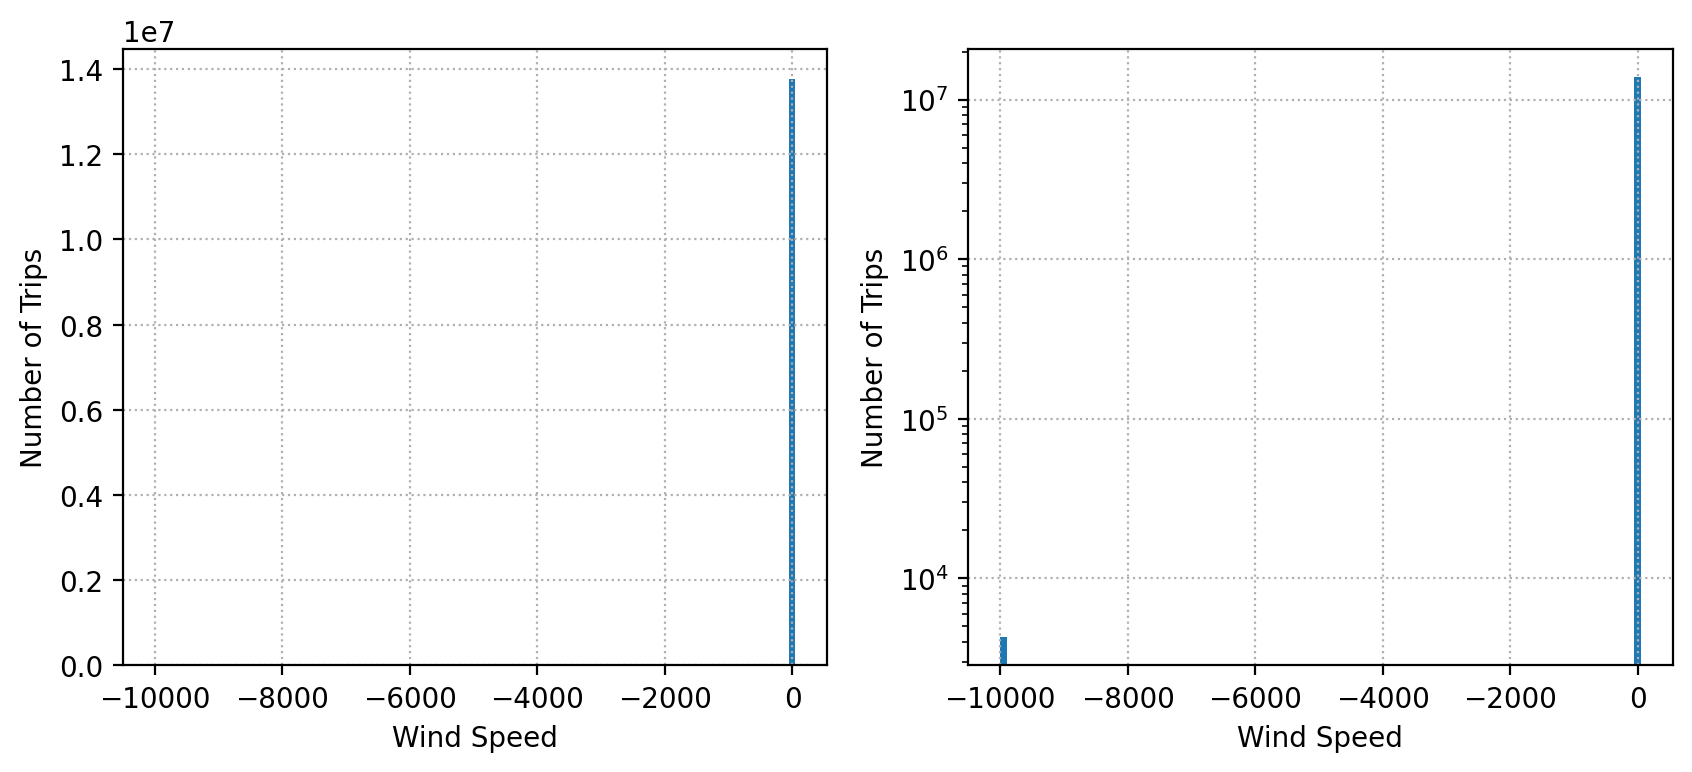

In [237]:
# Q: What is the distribution of wind speed?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['wind_speed']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['wind_speed']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Wind Speed')
ax2.set_ylabel('Number of Trips')

plt.show()

In [1]:
# Q: What is the distribution of precipitation?
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
(df['precipitation']).hist(ax=ax1, bins=100, grid=False)
ax1.grid(linestyle=':')
ax1.set_xlabel('Precipitation')
ax1.set_ylabel('Number of Trips')

ax2 = plt.subplot(1, 2, 2)
(df['precipitation']).hist(ax=ax2, bins=100, grid=False)
ax2.set_yscale('log')
ax2.grid(linestyle=':')
ax2.set_xlabel('Precipitation')
ax2.set_ylabel('Number of Trips')

plt.show()

NameError: name 'plt' is not defined

Text(0, 0.5, 'Number of Trips')

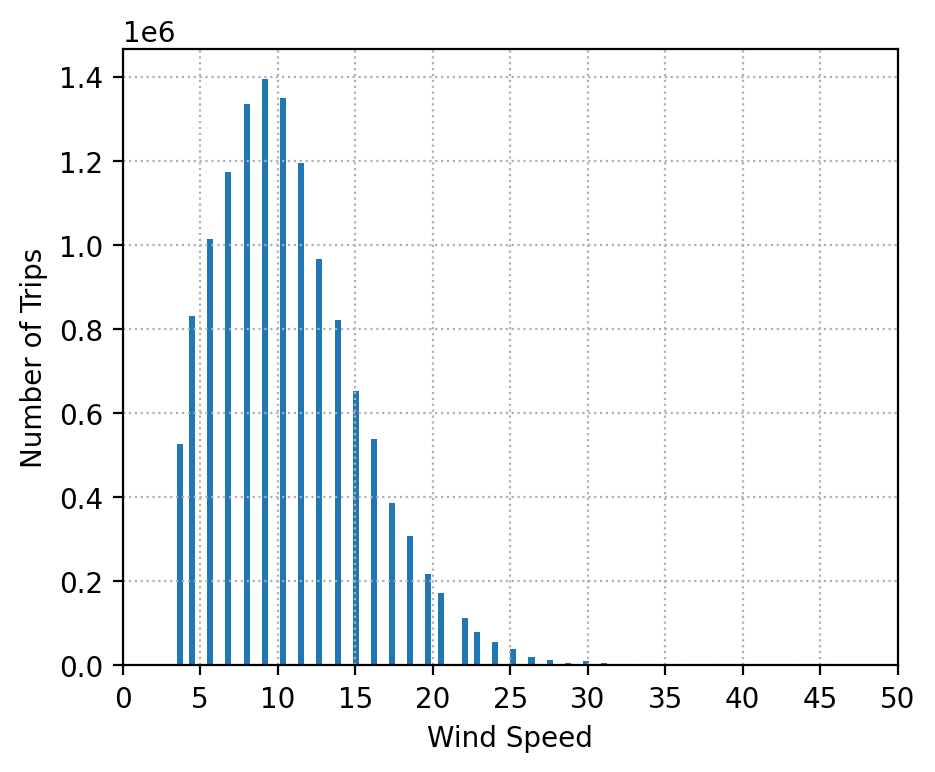

In [247]:
# Q: What is the distribution of wind speed > 0 mph?
ax = (df['wind_speed'][df['wind_speed'] > 0]).hist(figsize=(5, 4), bins=100, grid=False)
ax.set_xticks(np.arange(0, 50 + 0.1, 5))
ax.grid(linestyle=':')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Number of Trips')

In [255]:
# Q: What wind speed represents the spikes above?
df['wind_speed'].value_counts().head(10)

wind_speed
9.2     1394610
10.4    1349666
8.1     1335498
11.5    1194048
6.9     1172620
5.8     1013709
12.7     965469
4.6      831596
13.8     820089
15.0     653402
Name: count, dtype: int64

In [257]:
# Q: Anything special about rows with largest wind speed?
df.nlargest(10, 'wind_speed')

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_id,from_station_name,latitude_start,longitude_start,...,windchill,dewpoint,humidity,pressure,visibility,wind_speed,precipitation,events,rain,conditions
6594569,8769279,Subscriber,Male,2016-02-19 12:59:00,2016-02-19 13:31:00,1875,19,Loomis St & Taylor St (*),41.869417,-87.660996,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594570,8769278,Subscriber,Male,2016-02-19 12:59:00,2016-02-19 13:12:00,783,6,Dusable Harbor,41.885042,-87.612795,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594571,8769276,Subscriber,Male,2016-02-19 12:59:00,2016-02-19 13:08:00,540,417,Cornell Ave & Hyde Park Blvd,41.802406,-87.586924,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594572,8769274,Subscriber,Male,2016-02-19 12:59:00,2016-02-19 13:02:00,212,32,Racine Ave & Congress Pkwy,41.874640,-87.657030,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594573,8769273,Subscriber,Male,2016-02-19 12:59:00,2016-02-19 13:06:00,428,74,Kingsbury St & Erie St,41.893882,-87.641711,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594574,8769272,Subscriber,Male,2016-02-19 12:59:00,2016-02-19 13:06:00,424,195,Columbus Dr & Randolph St,41.884728,-87.619521,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594575,8769271,Subscriber,Male,2016-02-19 12:58:00,2016-02-19 13:04:00,322,51,Clark St & Randolph St,41.884576,-87.631890,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594576,8769269,Subscriber,Male,2016-02-19 12:58:00,2016-02-19 13:08:00,592,55,Halsted St & Roosevelt Rd,41.867324,-87.648625,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594577,8769267,Subscriber,Male,2016-02-19 12:58:00,2016-02-19 13:02:00,230,109,900 W Harrison St,41.874675,-87.650019,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy
6594578,8769266,Subscriber,Male,2016-02-19 12:58:00,2016-02-19 13:03:00,295,19,Loomis St & Taylor St (*),41.869417,-87.660996,...,-999.0,39.0,48.0,29.49,10.0,42.6,-9999.0,partlycloudy,0,Partly Cloudy


In [259]:
# Q: Which weather conditions have wind speed = 9.2 miles?
idx = df['wind_speed'] == 9.2
pd.concat([(df['conditions'][idx].value_counts() / idx.sum()).rename('= 9.2 Miles Wind Speed of Trip % in Weather Conditions'),
           (df['conditions'].value_counts() / df['conditions'].count()).rename('Total Trip % in Weather Conditions')],
          join='inner', axis=1).round(4) * 100

,= 9.2 Miles Wind Speed of Trip % in Weather Conditions,Total Trip % in Weather Conditions
conditions,,
Mostly Cloudy,32.28,32.04
Overcast,22.76,21.67
Scattered Clouds,17.89,17.18
Partly Cloudy,16.72,18.13
Clear,5.16,5.55
Light Rain,2.49,2.41
Haze,0.79,0.58
Light Drizzle,0.50,0.49
Light Snow,0.49,0.66


In [263]:
# Q: Which station have most starting trips?
df['from_station_name'].value_counts().head(10)

from_station_name
Lake Shore Dr & Monroe St       209374
Clinton St & Washington Blvd    187581
Streeter Dr & Grand Ave         187434
Theater on the Lake             185486
Lake Shore Dr & North Blvd      165229
Michigan Ave & Oak St           163251
Millennium Park                 157699
Canal St & Adams St             157166
Clinton St & Madison St         140440
Canal St & Madison St           139846
Name: count, dtype: int64

In [287]:
# Q: What are their corresponding docking capacity?
# Get the top 10 most common starting stations
top_10_stations = df['from_station_name'].value_counts().head(10).index

# Filter the DataFrame to include only rows for these top 10 stations
top_10_station_capacities = df[df['from_station_name'].isin(top_10_stations)][['from_station_name', 'dpcapacity_start']]

# Group by station name and find the most common capacity for each station (or list all unique capacities)
top_10_station_capacities = top_10_station_capacities.groupby('from_station_name')['dpcapacity_start'].unique()

# Display the result
top_10_station_capacities

from_station_name
Canal St & Adams St             [27.0, 39.0, 47.0]
Canal St & Madison St           [23.0, 27.0, 35.0]
Clinton St & Madison St               [23.0, 31.0]
Clinton St & Washington Blvd                [31.0]
Lake Shore Dr & Monroe St             [11.0, 39.0]
Lake Shore Dr & North Blvd            [15.0, 39.0]
Michigan Ave & Oak St                 [15.0, 23.0]
Millennium Park                       [35.0, 47.0]
Streeter Dr & Grand Ave                     [47.0]
Theater on the Lake                   [15.0, 23.0]
Name: dpcapacity_start, dtype: object

In [305]:
# Q: How many starting stations have 0, 9, 11, 12, 14, 15, 16, 19, 20, 23, 27, 28, 31, 35, 36, 39, 43, 47, 51, 55 docking capacity?
df['dpcapacity_start'].value_counts().sort_index()

dpcapacity_start
0.0         582
9.0         536
11.0     474280
12.0        143
14.0       1624
15.0    4195753
16.0      41925
19.0    3298588
20.0      25720
23.0    2008036
27.0     927716
28.0      25905
31.0    1241830
35.0     354802
36.0      17393
39.0     649063
43.0     125053
47.0     351225
51.0       5073
55.0      28315
Name: count, dtype: int64

In [267]:
# Q: Which station have most ending trips?
df['to_station_name'].value_counts().head(10)

to_station_name
Streeter Dr & Grand Ave         205409
Lake Shore Dr & Monroe St       202130
Theater on the Lake             197186
Lake Shore Dr & North Blvd      184484
Clinton St & Washington Blvd    181896
Michigan Ave & Oak St           174920
Millennium Park                 173551
Streeter Dr & Illinois St       162992
Canal St & Adams St             154990
Canal St & Madison St           149393
Name: count, dtype: int64

In [291]:
# Q: What are their corresponding docking capacity?
# Copy and change the above code

In [307]:
# Q: How many ending stations have 0, 9, 11, 12, 14, 15, 16, 19, 20, 23, 27, 28, 31, 35, 36, 39, 43, 47, 51, 55 docking capacity?
df['dpcapacity_end'].value_counts().sort_index()

dpcapacity_end
0.0         615
9.0         510
11.0     467259
12.0        142
14.0       1790
15.0    4238596
16.0      44478
19.0    3292242
20.0      28673
23.0    2019046
27.0     908242
28.0      19808
31.0    1194138
35.0     364037
36.0      16422
39.0     665685
43.0     127964
47.0     353916
51.0       4306
55.0      25666
Name: count, dtype: int64

In [265]:
# Q: Which station have least starting trips?
df['from_station_name'].value_counts().tail(10)

from_station_name
May St & 69th St               25
Austin Blvd & Madison St       24
Ashland Ave & Garfield Blvd    23
Commercial Ave & 83rd St       20
Ashland Ave & 66th St          20
Damen Ave & 61st St            17
Racine Ave & 61st St           11
Seeley Ave & Garfield Blvd      8
Damen Ave & Garfield Blvd       7
Phillips Ave & 82nd St          5
Name: count, dtype: int64

In [269]:
# Q: Which station have least ending trips?
df['to_station_name'].value_counts().tail(10)

to_station_name
Delano Ct & Roosevelt Rd       26
Commercial Ave & 83rd St       21
Ashland Ave & Garfield Blvd    20
Ashland Ave & 66th St          18
Damen Ave & 61st St            17
Austin Blvd & Madison St       13
Racine Ave & 61st St           10
Phillips Ave & 82nd St         10
Seeley Ave & Garfield Blvd      9
Damen Ave & Garfield Blvd       6
Name: count, dtype: int64

In [295]:
# Q: What are the most popular starting station?
df2 = (df
       [['longitude_start', 'latitude_start']]
       .value_counts()
       .map(np.log10)
       .rename('Log10(Number of Trips)')
       .reset_index())

df2.head(10)

,longitude_start,latitude_start,Log10(Number of Trips)
0,-87.616743,41.880958,5.287136
1,-87.612043,41.892278,5.272848
2,-87.630834,41.926277,5.268311
3,-87.641170,41.883380,5.239375
4,-87.626804,41.911722,5.218086
5,-87.623777,41.900960,5.171343
6,-87.624084,41.881032,5.156031
7,-87.639833,41.882091,5.145650
8,-87.639904,41.879255,5.145125
9,-87.612200,41.891071,5.136251


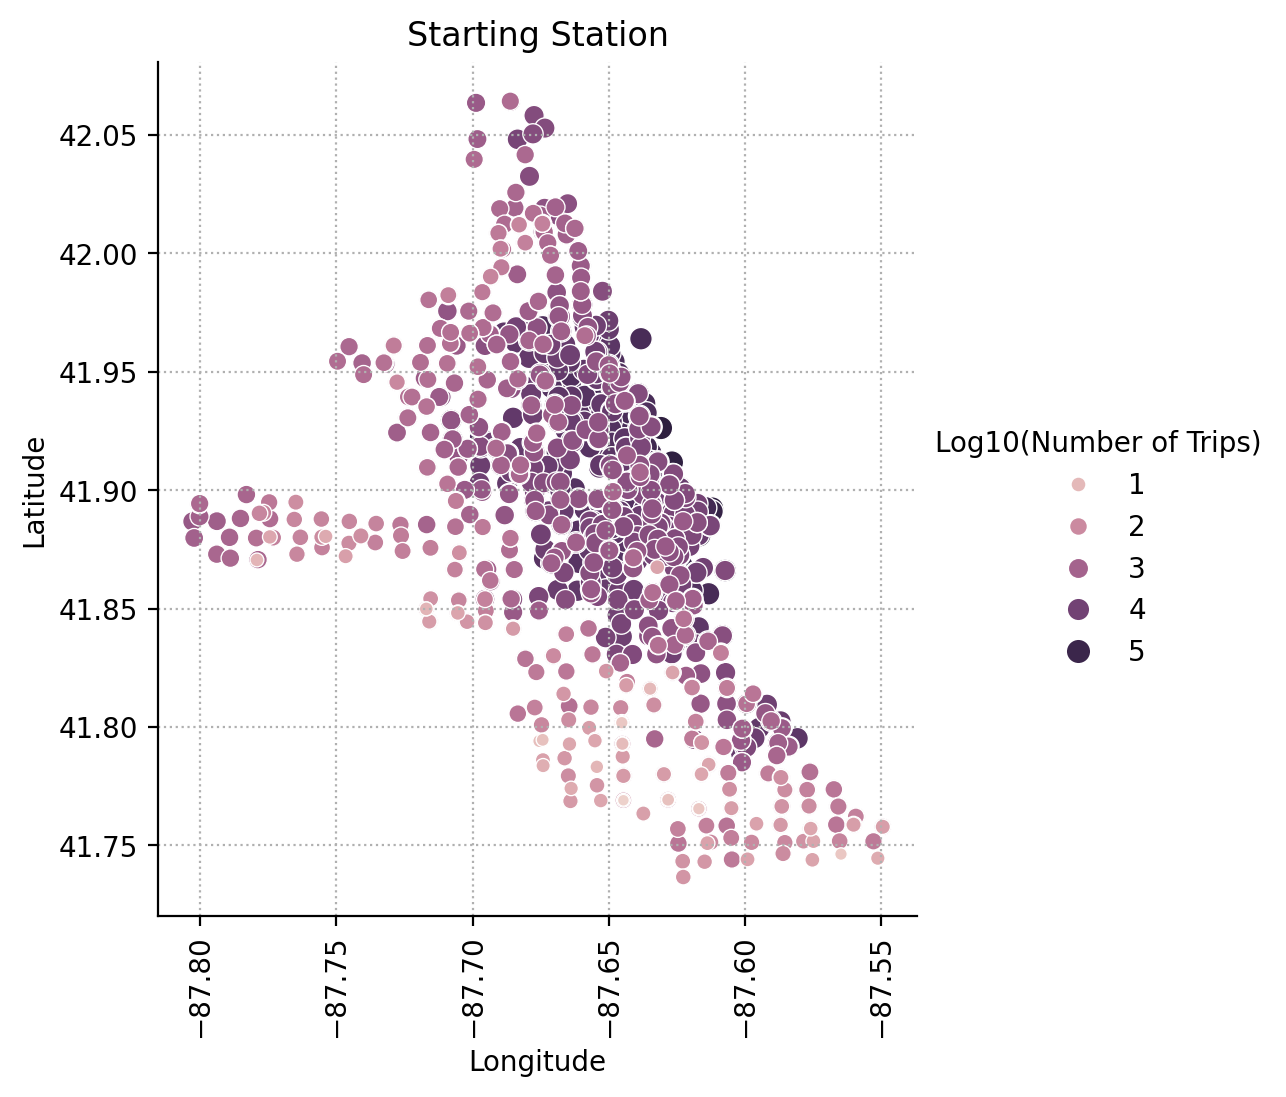

In [297]:
g = sns.relplot(data=df2,
                kind='scatter',
                x='longitude_start',
                y='latitude_start',
                hue='Log10(Number of Trips)',
                size='Log10(Number of Trips)')
g.ax.grid(linestyle=':')
g.tick_params(axis='x', rotation=90)
g.ax.set_xlabel('Longitude')
g.ax.set_ylabel('Latitude')
g.ax.set_title('Starting Station');